In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [2]:
data = pd.read_csv('FIFA19Data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.000000,4.000000,4.000000,Medium/ Medium,Messi,Yes,RF,10.000000,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.000000,95.000000,70.000000,90.000000,86.000000,97.000000,93.000000,94.000000,87.000000,96.000000,91.000000,86.000000,91.000000,95.000000,95.000000,85.000000,68.000000,72.000000,59.000000,94.000000,48.000000,22.000000,94.000000,94.000000,75.000000,96.000000,33.000000,28.000000,26.000000,6.000000,11.000000,15.000000,14.000000,8.000000,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.000000,4.000000,5.000000,High/ Low,C. Ronaldo,Yes,ST,7.000000,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.000000,94.000000,89.000000,81.000000,87.000000,88.000000,81.000000,76.000000,77.000000,94.000000,89.000000,91.000000,87.000000,96.000000,70.000000,95.000000,95.000000,88.000000,79.000000,93.000000,63.000000,29.000000,95.000000,82.000000,85.000000,95.000000,28.000000,31.000000,23.000000,7.000000,11.000000,15.000000,14.000000,11.000000,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.000000,5.000000,5.000000,High/ Medium,Neymar,Yes,LW,10.000000,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.000000,87.000000,62.000000,84.000000,84.000000,96.000000,88.000000,87.000000,78.000000,95.000000,94.000000,90.000000,96.000000,94.000000,84.000000,80.000000,61.000000,81.000000,49.000000,82.000000,56.000000,36.000000,89.000000,87.000000,81.000000,94.000000,27.000000,24.000000,33.000000,9.000000,9.000000,15.000000,15.000000,11.000000,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.000000,3.000000,1.000000,Medium/ Medium,Lean,Yes,GK,1.000000,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,13.000000,21.000000,50.000000,13.000000,18.000000,21.000000,19.000000,51.000000,42.000000,57.000000,58.000000,60.000000,90.000000,43.000000,31.000000,67.000000,43.000000,64.000000,12.000000,38.000000,30.000000,12.000000,68.000000,40.000000,68.000000,15.000000,21.000000,13.000000,90.000000,85.000000,87.000000,88.000000,94.000000,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10

In [3]:
# checking if the data contains any NULL value

data.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [4]:
# taking out the information from the given data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)


data.fillna(0, inplace = True)

In [6]:
# selecting some of the interesting and important columns from the set of columns in the given dataset

selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

In [7]:
fifa = pd.DataFrame(data, columns=selected_columns)
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.000000,4.000000,4.000000,Medium/ Medium,Messi,RF,5'7,159lbs,95.000000,70.000000,90.000000,86.000000,97.000000,93.000000,94.000000,87.000000,96.000000,91.000000,86.000000,91.000000,95.000000,95.000000,85.000000,68.000000,72.000000,59.000000,94.000000,48.000000,22.000000,94.000000,94.000000,75.000000,96.000000,33.000000,28.000000,26.000000,6.000000,11.000000,15.000000,14.000000,8.000000,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.000000,4.000000,5.000000,High/ Low,C. Ronaldo,ST,6'2,183lbs,94.000000,89.000000,81.000000,87.000000,88.000000,81.000000,76.000000,77.000000,94.000000,89.000000,91.000000,87.000000,96.000000,70.000000,95.000000,95.000000,88.000000,79.000000,93.000000,63.000000,29.000000,95.000000,82.000000,85.000000,95.000000,28.000000,31.000000,23.000000,7.000000,11.000000,15.000000,14.000000,11.000000,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.000000,5.000000,5.000000,High/ Medium,Neymar,LW,5'9,150lbs,87.000000,62.000000,84.000000,84.000000,96.000000,88.000000,87.000000,78.000000,95.000000,94.000000,90.000000,96.000000,94.000000,84.000000,80.000000,61.000000,81.000000,49.000000,82.000000,56.000000,36.000000,89.000000,87.000000,81.000000,94.000000,27.000000,24.000000,33.000000,9.000000,9.000000,15.000000,15.000000,11.000000,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.000000,3.000000,1.000000,Medium/ Medium,Lean,GK,6'4,168lbs,13.000000,21.000000,50.000000,13.000000,18.000000,21.000000,19.000000,51.000000,42.000000,57.000000,58.000000,60.000000,90.000000,43.000000,31.000000,67.000000,43.000000,64.000000,12.000000,38.000000,30.000000,12.000000,68.000000,40.000000,68.000000,15.000000,21.000000,13.000000,90.000000,85.000000,87.000000,88.000000,94.000000,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.000000,5.000000,4.000000,High/ High,Normal,RCM,5'11,154lbs,82.000000,55.000000,92.000000,82.000000,86.000000,85.000000,83.000000,91.000000,91.000000,78.000000,76.000000,79.000000,91.000000,77.000000,91.000000,63.000000,90.000000,75.000000,91.000000,76.000000,61.000000,87.000000,94.000000,79.000000,88.000000,68.000000,58.000000,51.000000,15.000000,13.000000,5.000000,10.000000,13.000000,€196.4M


In [8]:
# defining a function for cleaning the wage column

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

# applying the function to the wage column

fifa['Value'] = fifa['Value'].apply(lambda x: extract_value_from(x))
fifa['Wage'] = fifa['Wage'].apply(lambda x: extract_value_from(x))

fifa['Wage'].head()

0   565000.000000
1   405000.000000
2   290000.000000
3   260000.000000
4   355000.000000
Name: Wage, dtype: float64

Text(0.5, 1.0, 'Age distribution of all players in 2018/2019 season')

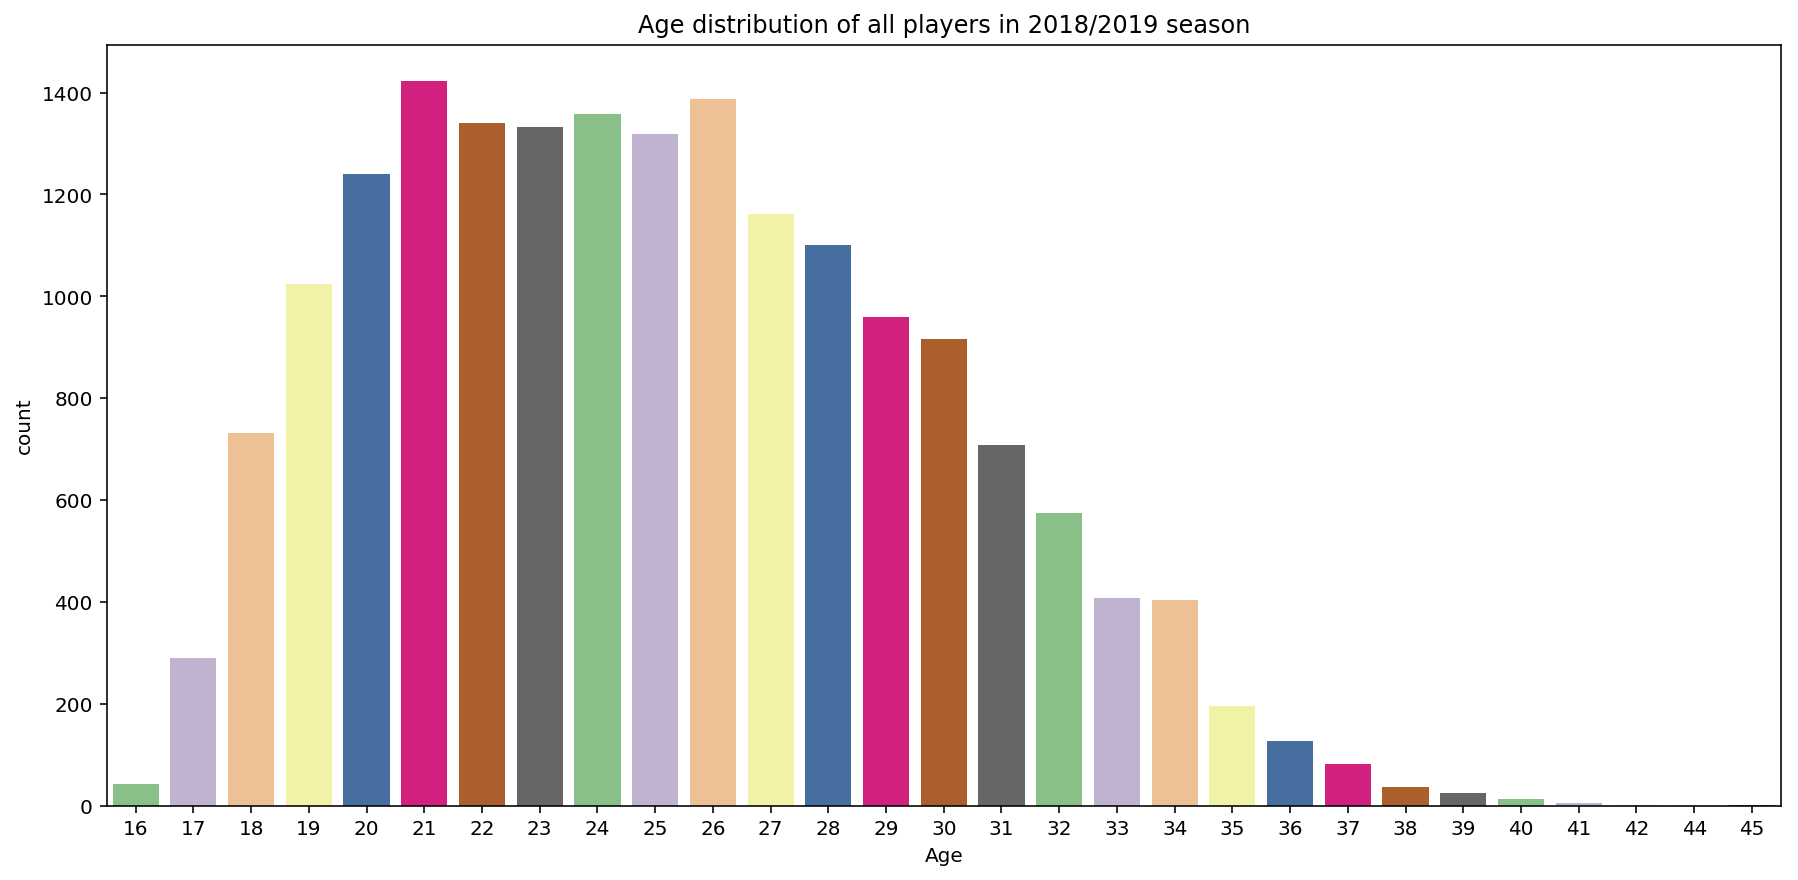

In [9]:
# find the age distribution of the whole data set
plt.figure(1, figsize=(15, 7))
sns.countplot( x= 'Age', data=fifa, palette='Accent')
plt.title('Age distribution of all players in 2018/2019 season')
# the graph shows that most of the age is distributed form 19 ~ 34 and is left skewed 

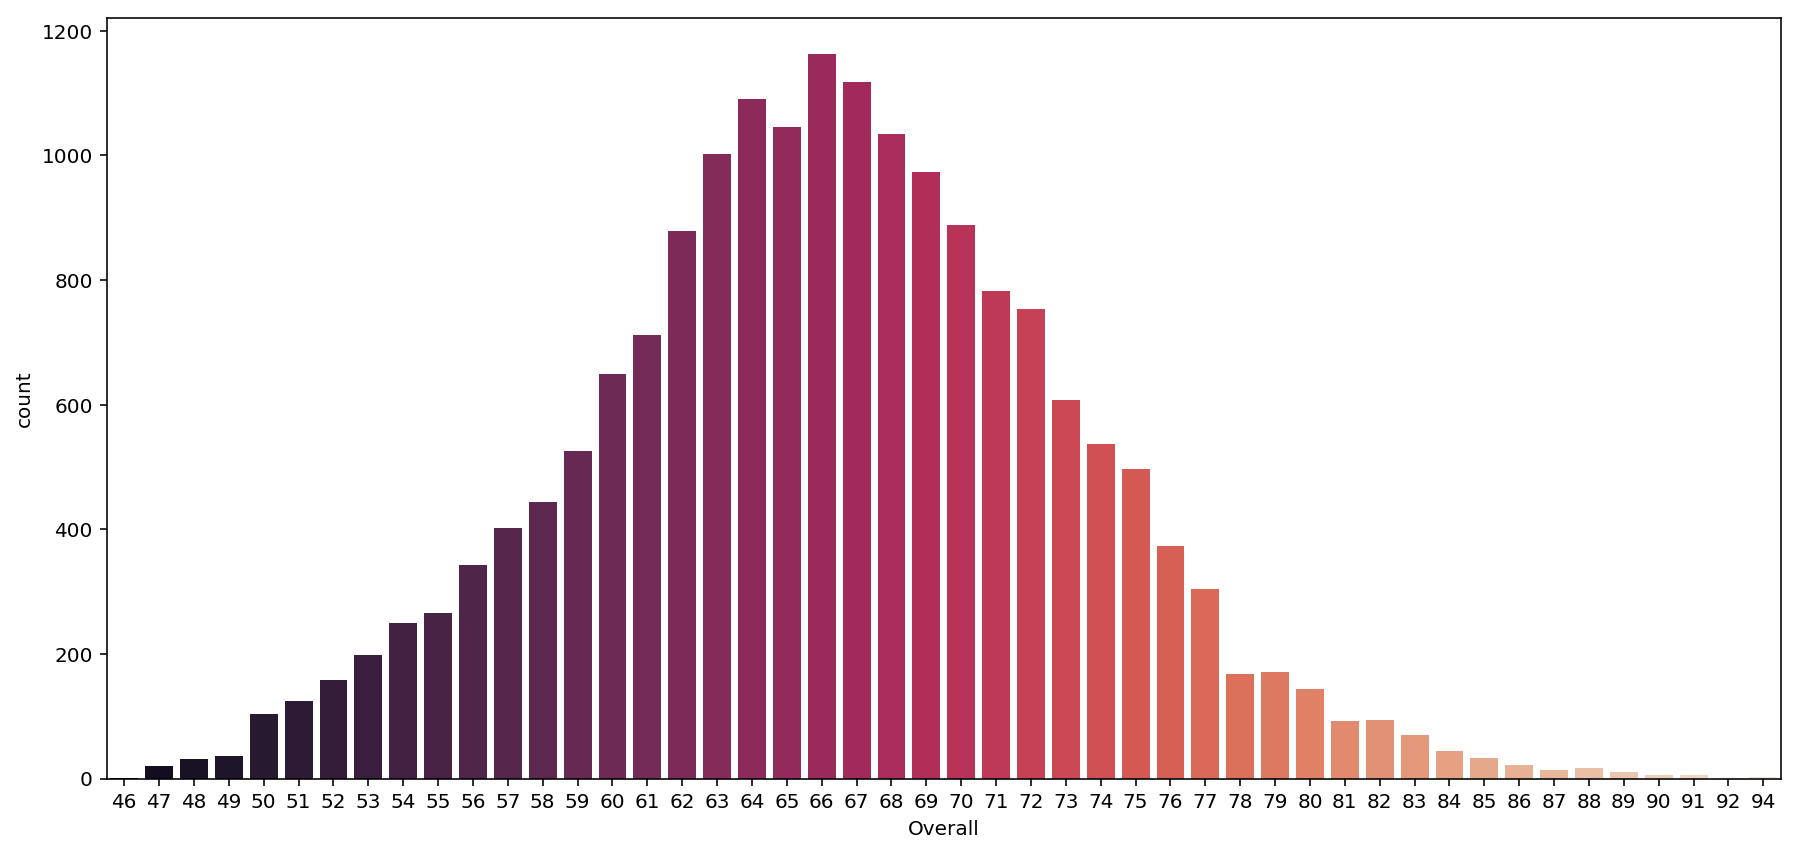

In [10]:
# Visualization of Player Overall by count
plt.figure(2,figsize=(15,7))
sns.countplot(fifa['Overall'], palette = 'rocket')
plt.show()
# We can see that the count of overall skill is normally distributed

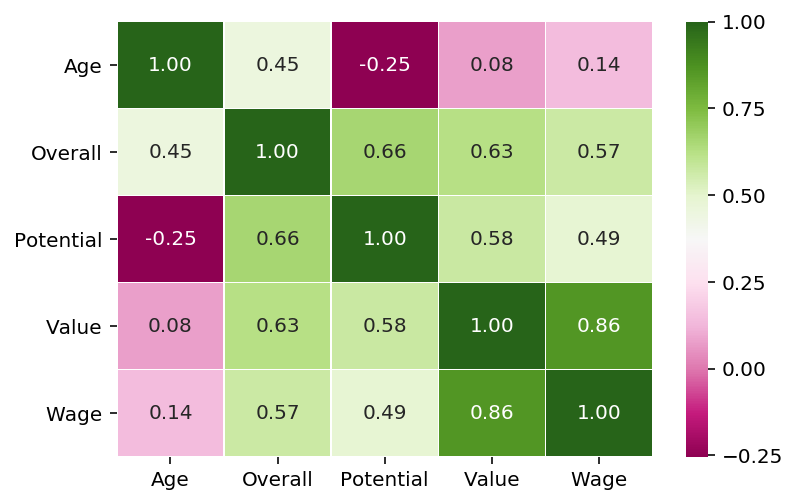

In [11]:
# Correlation between the most important parameters
correlation_fifa = fifa[['Age', 'Overall', 'Potential', 'Value', 'Wage']]

plot = sns.heatmap(correlation_fifa.corr(), annot=True, fmt = '.2f', linewidths=0.2, cmap='PiYG')

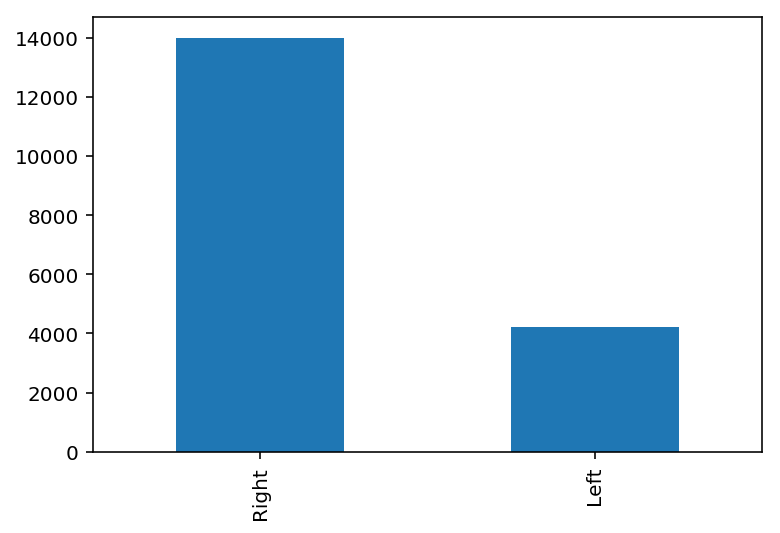

In [12]:
# comparison of preferred foot over the different players

fifa['Preferred Foot'].value_counts().plot.bar()

In [28]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby('Position')[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

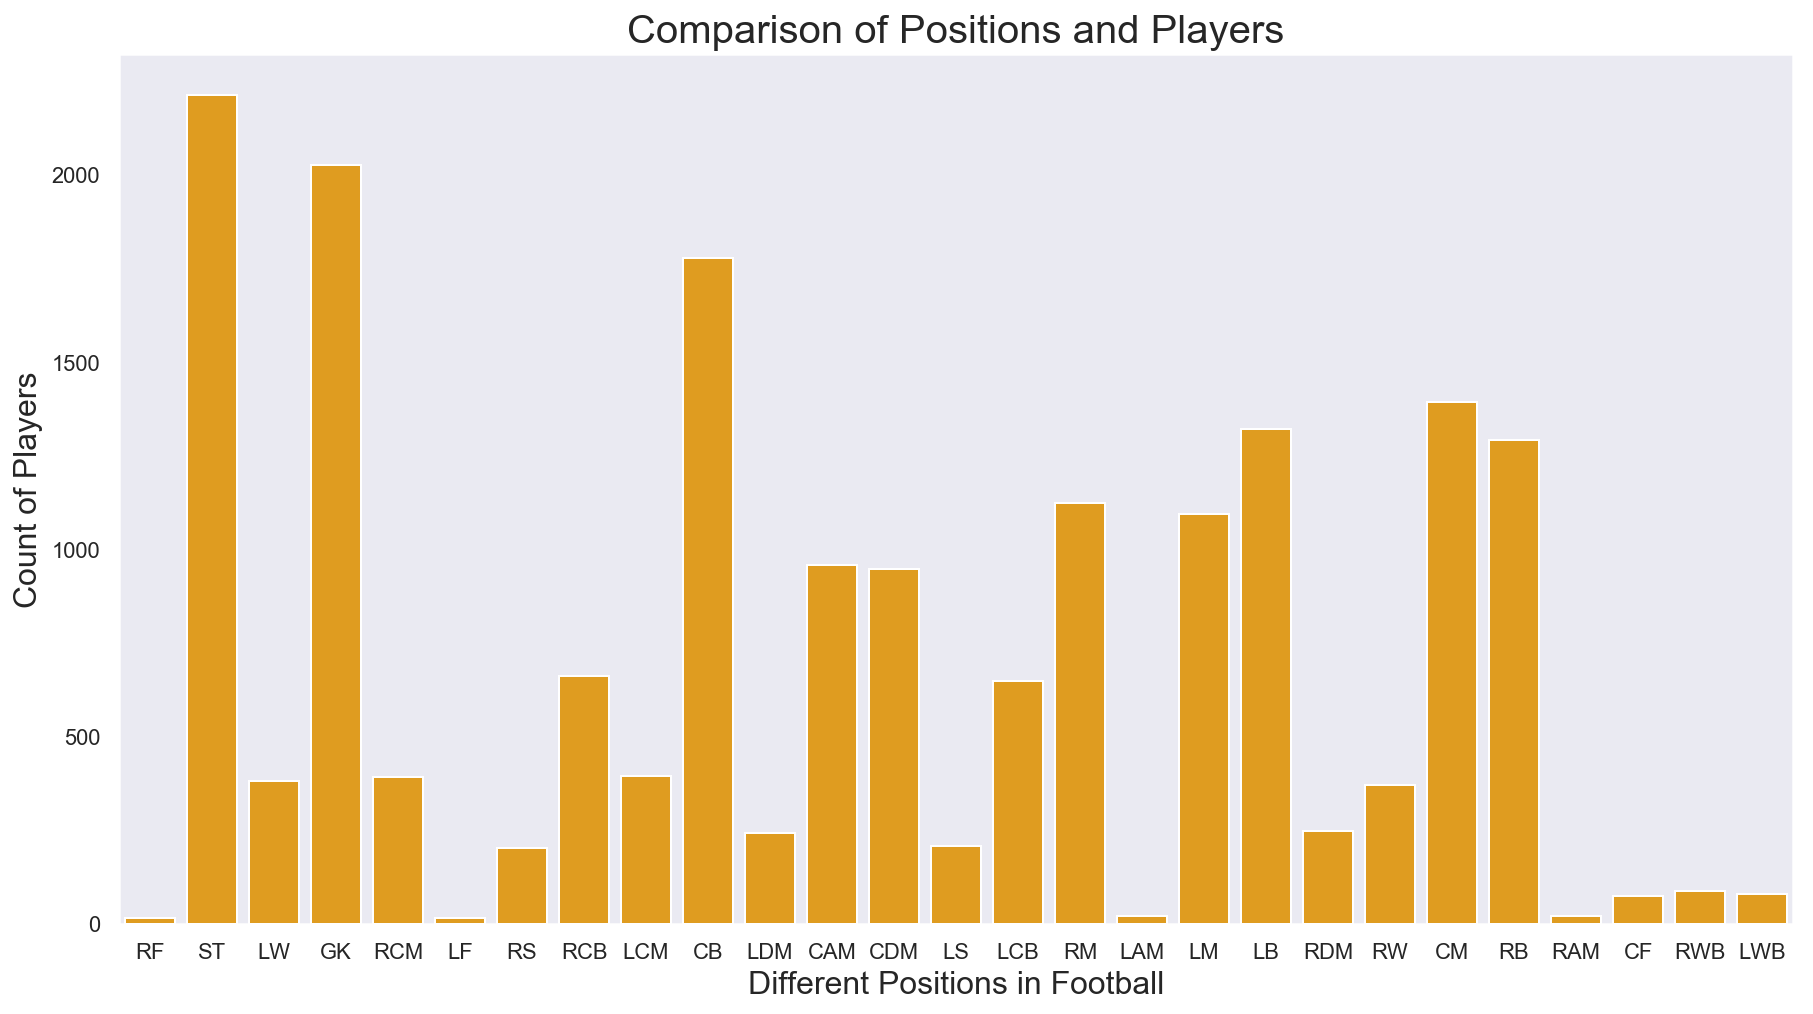

In [13]:
# different positions acquired by the players 

plt.figure(figsize = (15, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Position', data = fifa, color = 'orange')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

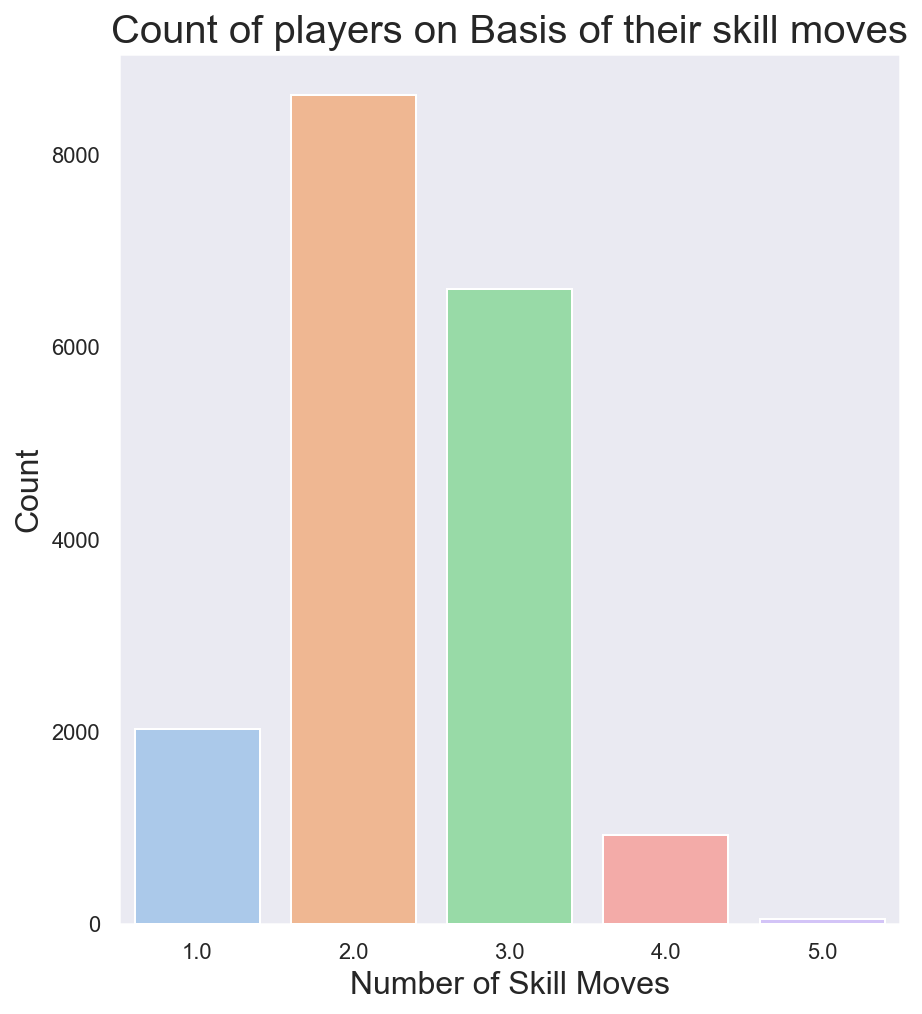

In [14]:
# Skill Moves of Players are given on a scale of 1-5 based on their dribbling and skill moves

plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'Skill Moves', data = fifa, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

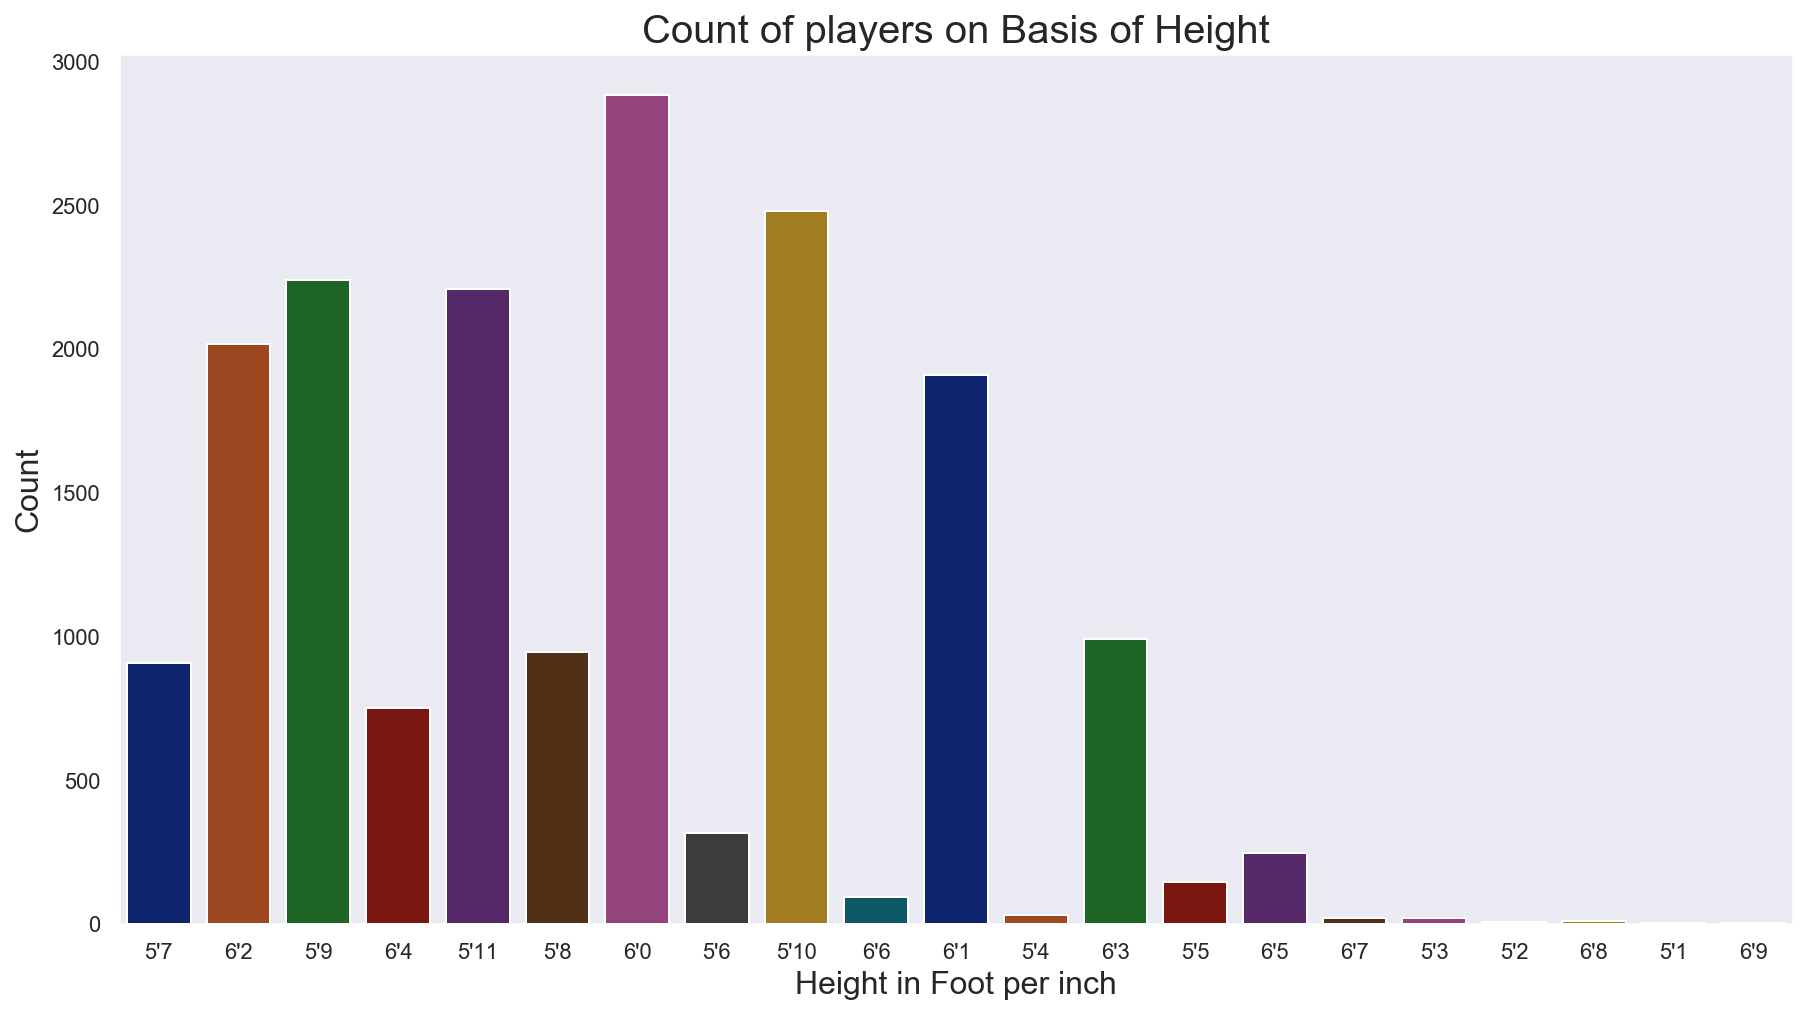

In [15]:
# Height of Players

plt.figure(figsize = (15, 8))
ax = sns.countplot(x = 'Height', data = fifa, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

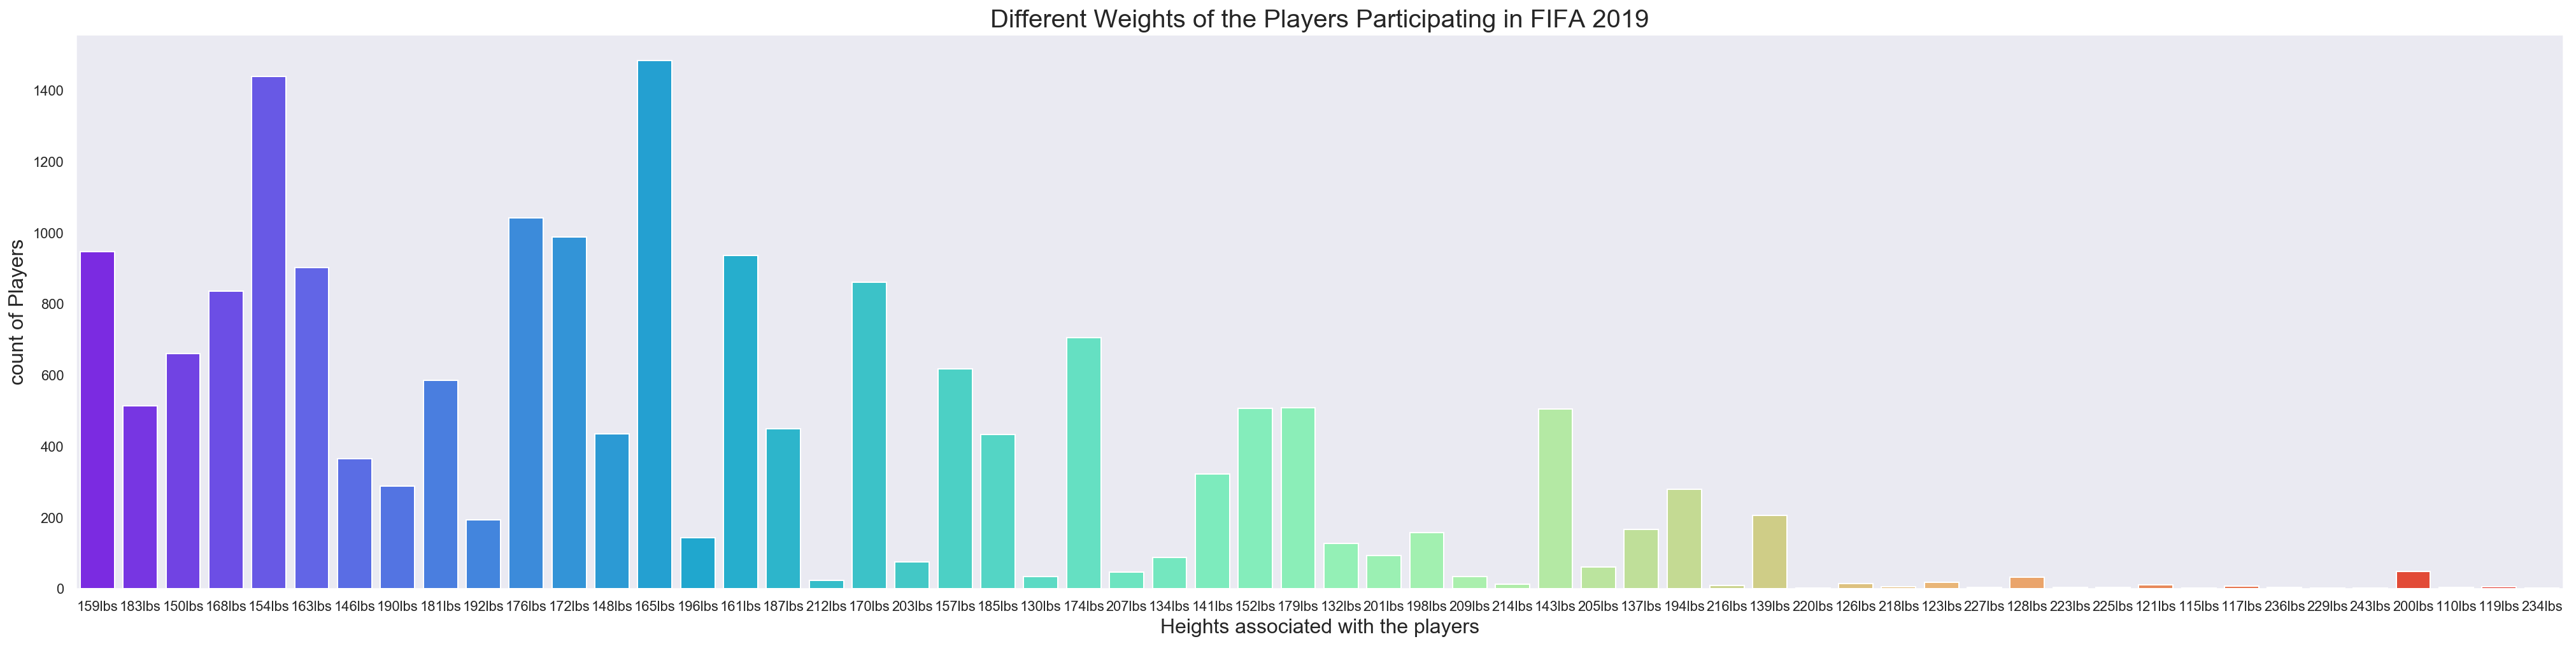

In [16]:
# To show Different body weight of the players participating in the FIFA 2019

plt.figure(figsize = (35, 8))
sns.countplot(x = 'Weight', data = fifa, palette = 'rainbow')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

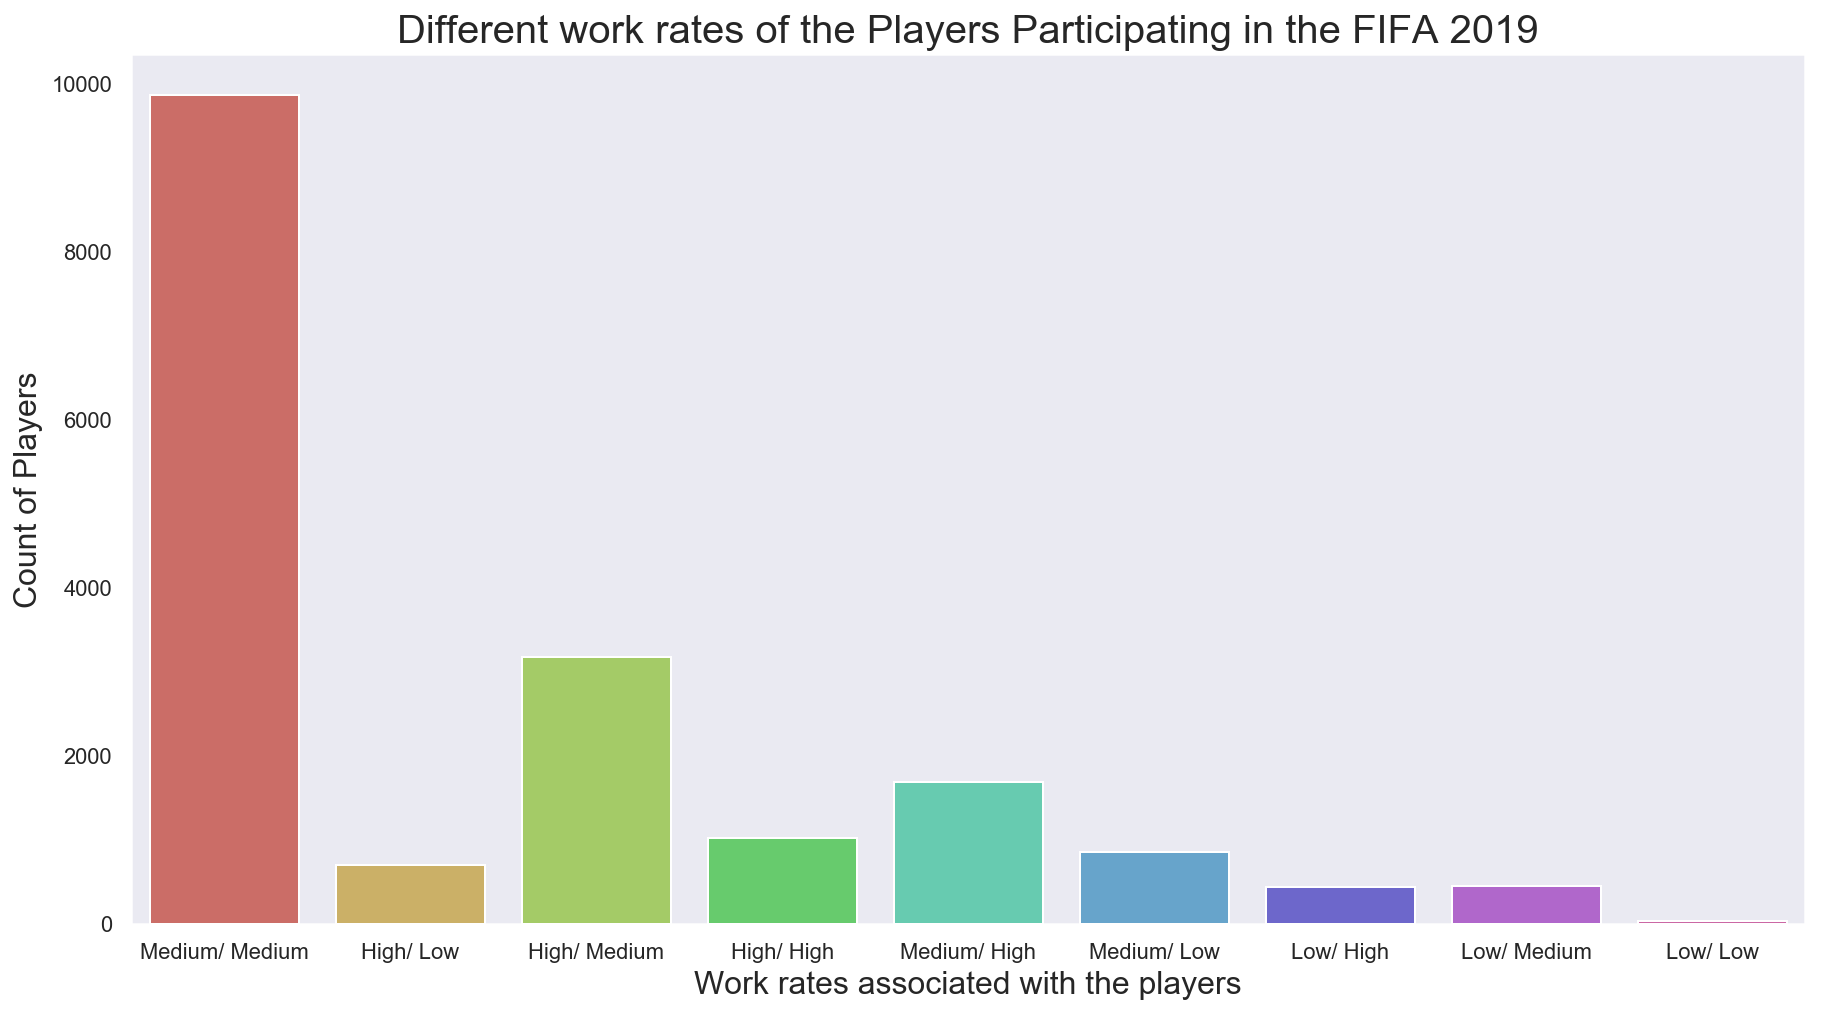

In [17]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Work Rate', data = fifa, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('Count of Players', fontsize = 16)
plt.show()

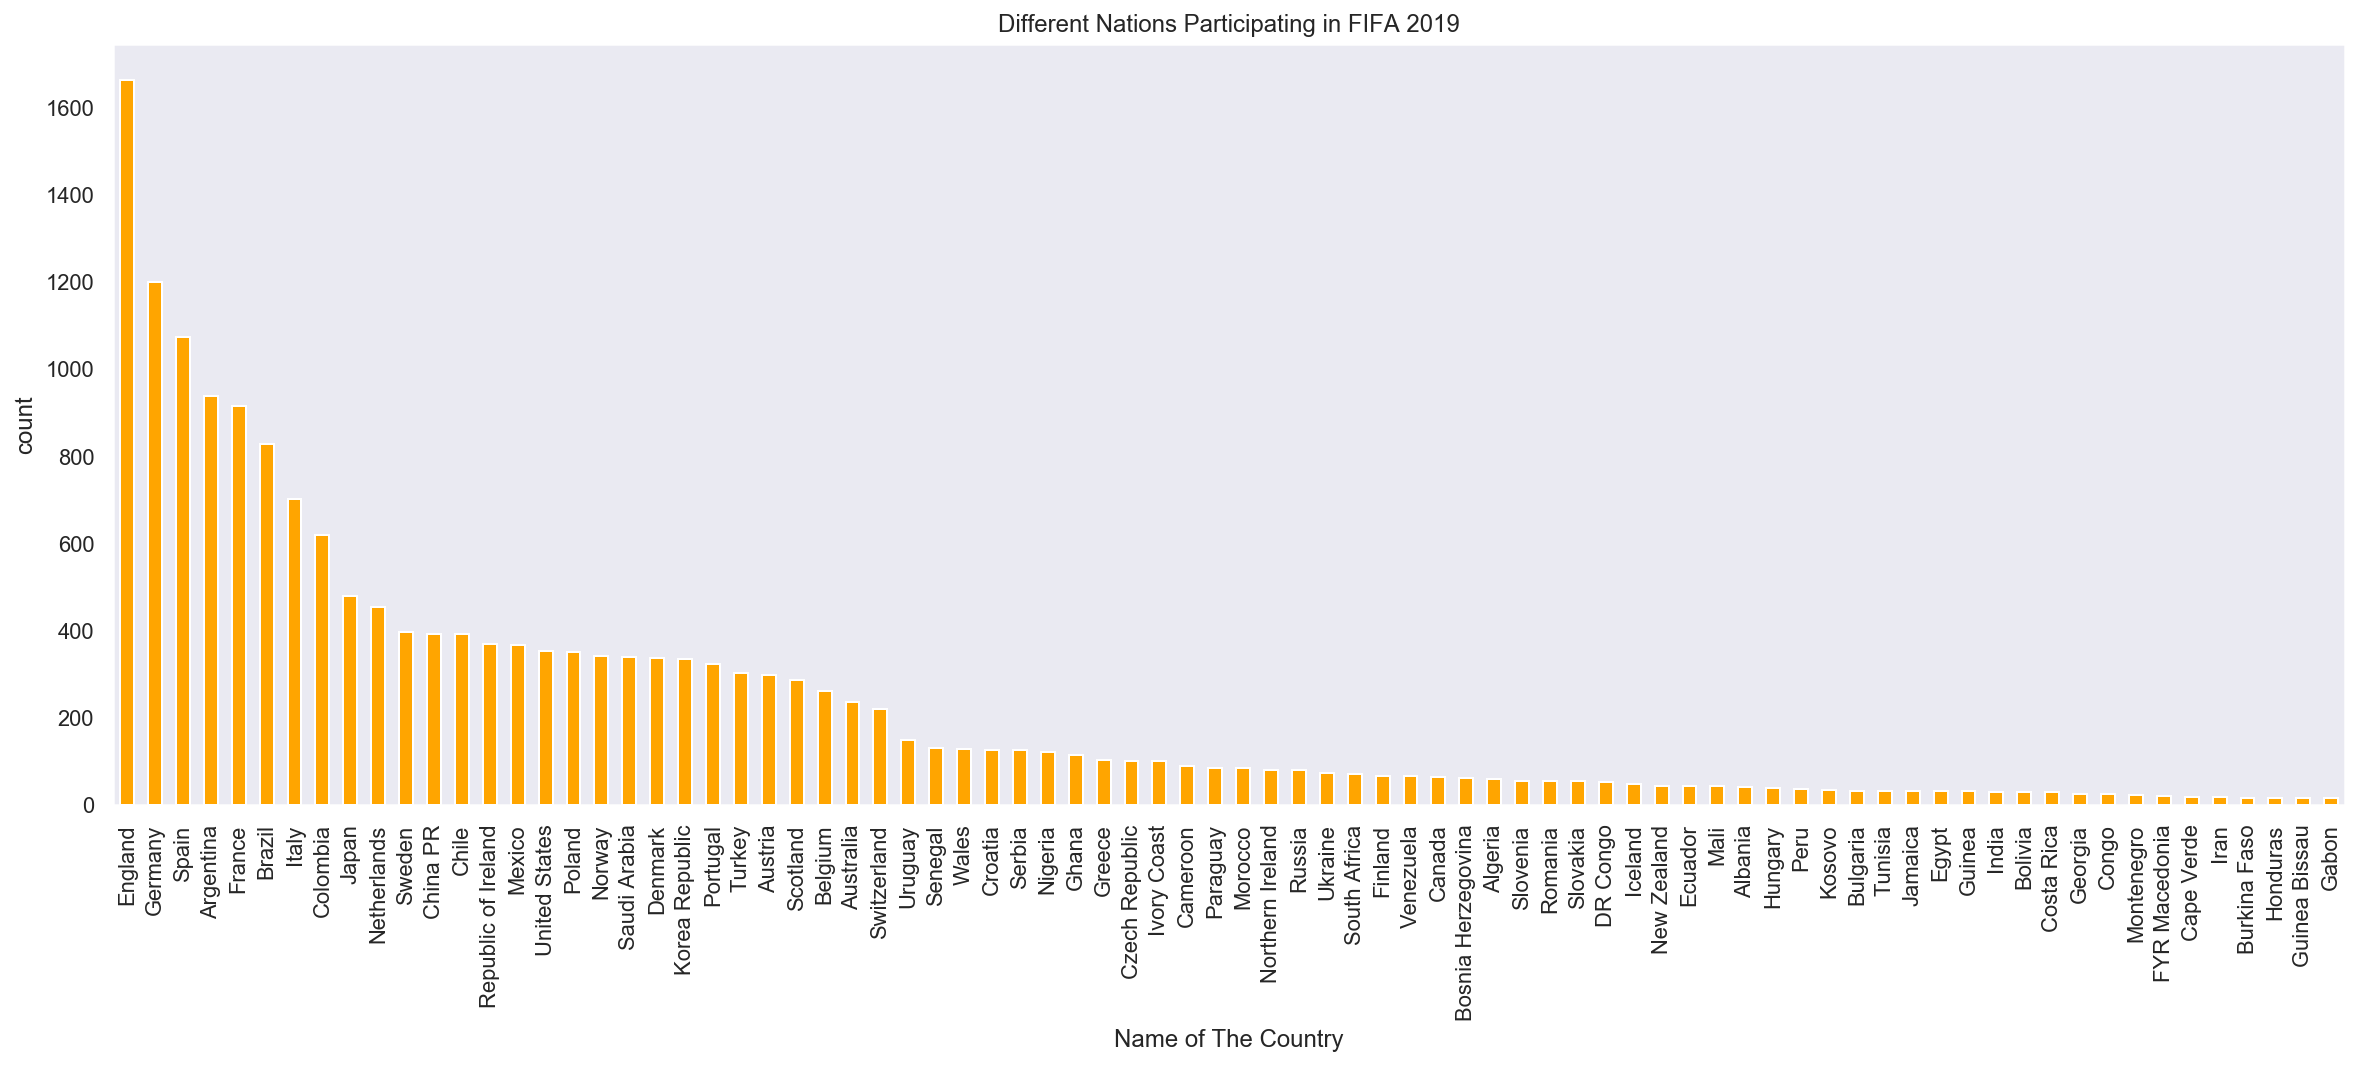

In [18]:
fifa['Nationality'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Nations Participating in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

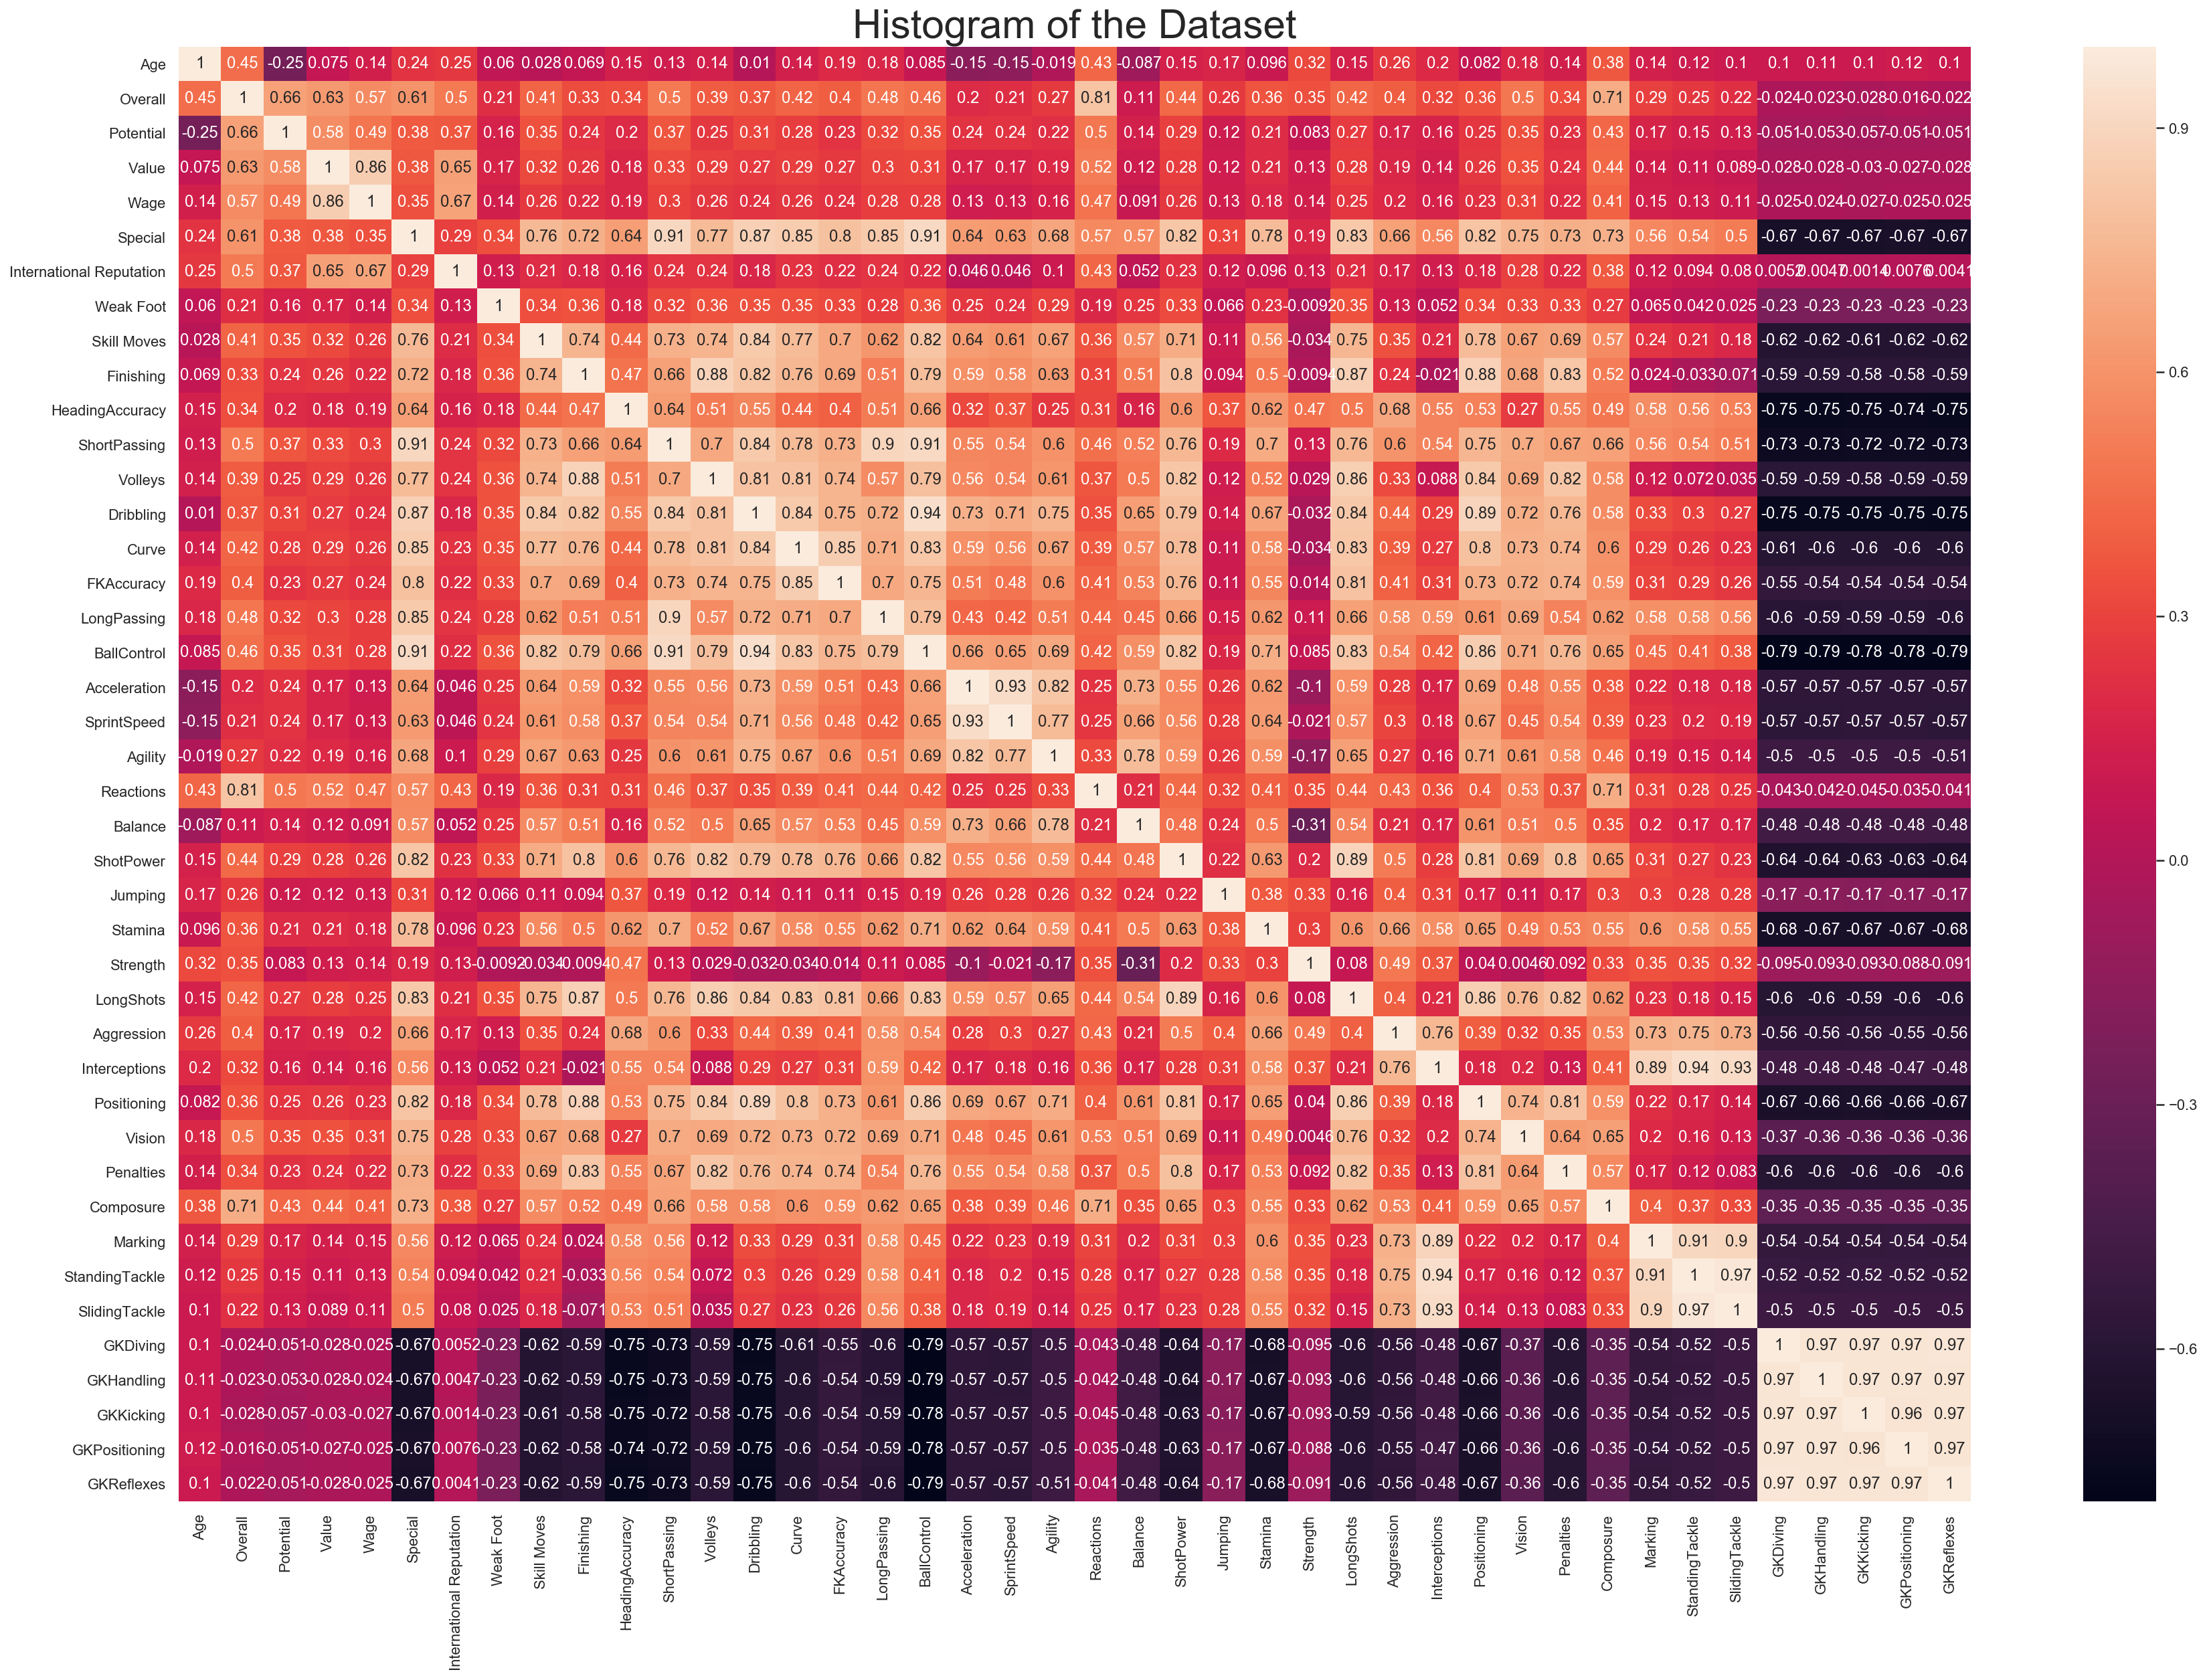

In [19]:

# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(fifa[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

In [20]:
# best players per each position with their age, club, and nationality based on their overall scores

fifa.iloc[fifa.groupby(fifa['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


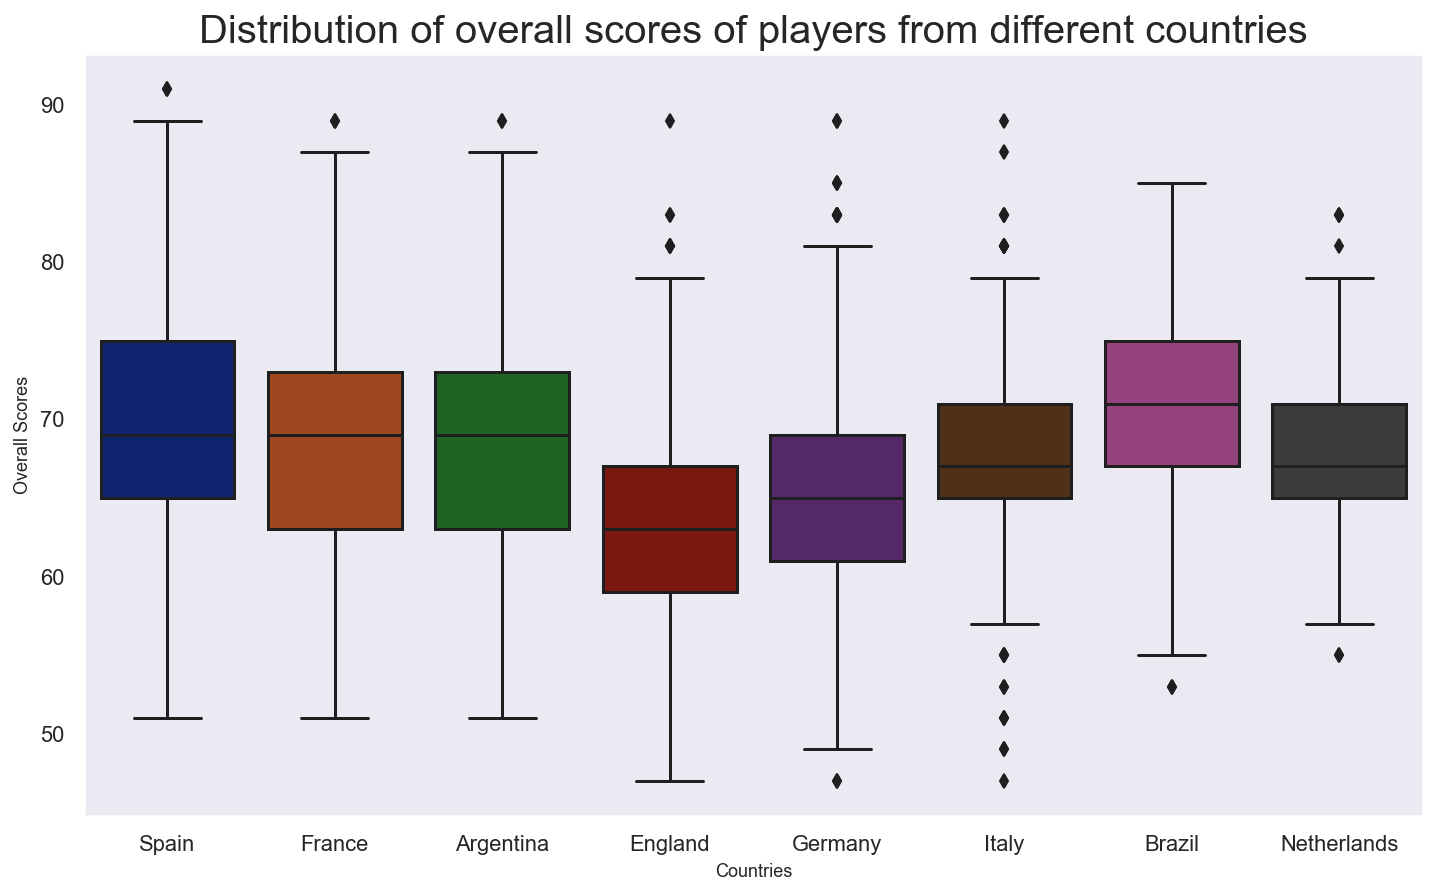

In [37]:
# Every Nations' Player and their overall scores

countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Netherlands')
data_countries = fifa.loc[fifa['Nationality'].isin(countries) & fifa['Overall']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.boxplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'dark')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

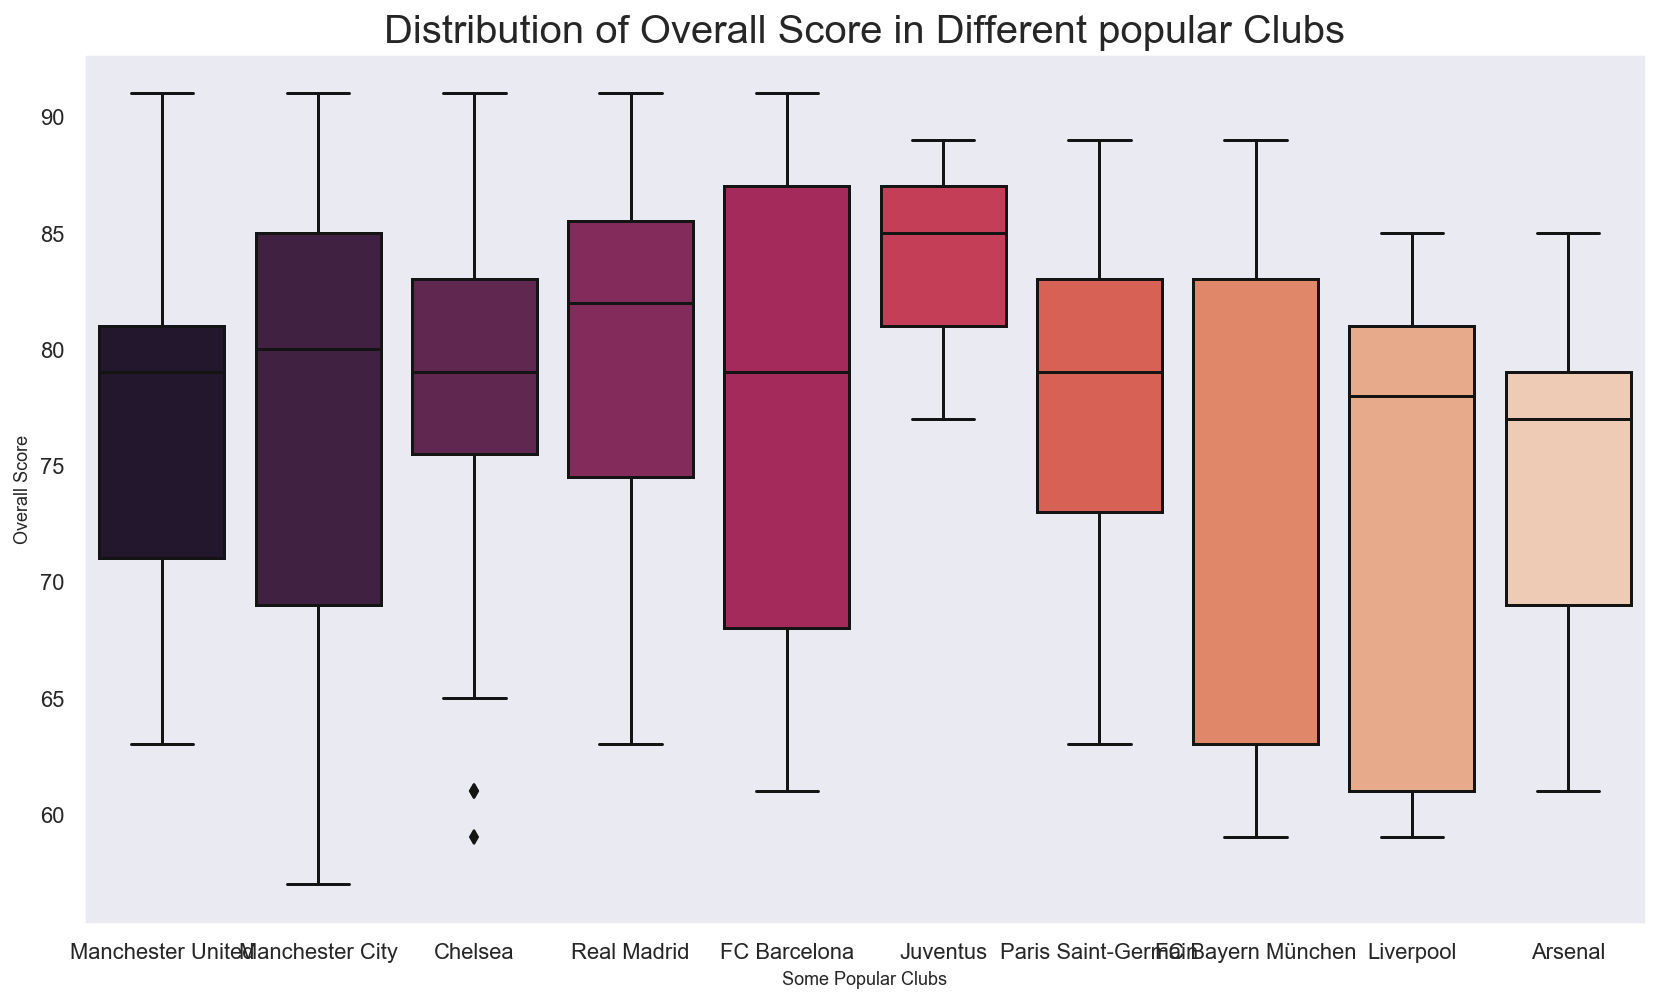

In [38]:
# Overall of players based on popular clubs
clubs = ('Manchester United', 'Liverpool', 'Manchester City', 'Arsenal', 'Chelsea',
             'Real Madrid', 'FC Barcelona', 'Juventus', 'FC Bayern München', 'Paris Saint-Germain')

data_clubs = fifa.loc[fifa['Club'].isin(clubs) & fifa['Overall']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'rocket')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.show()

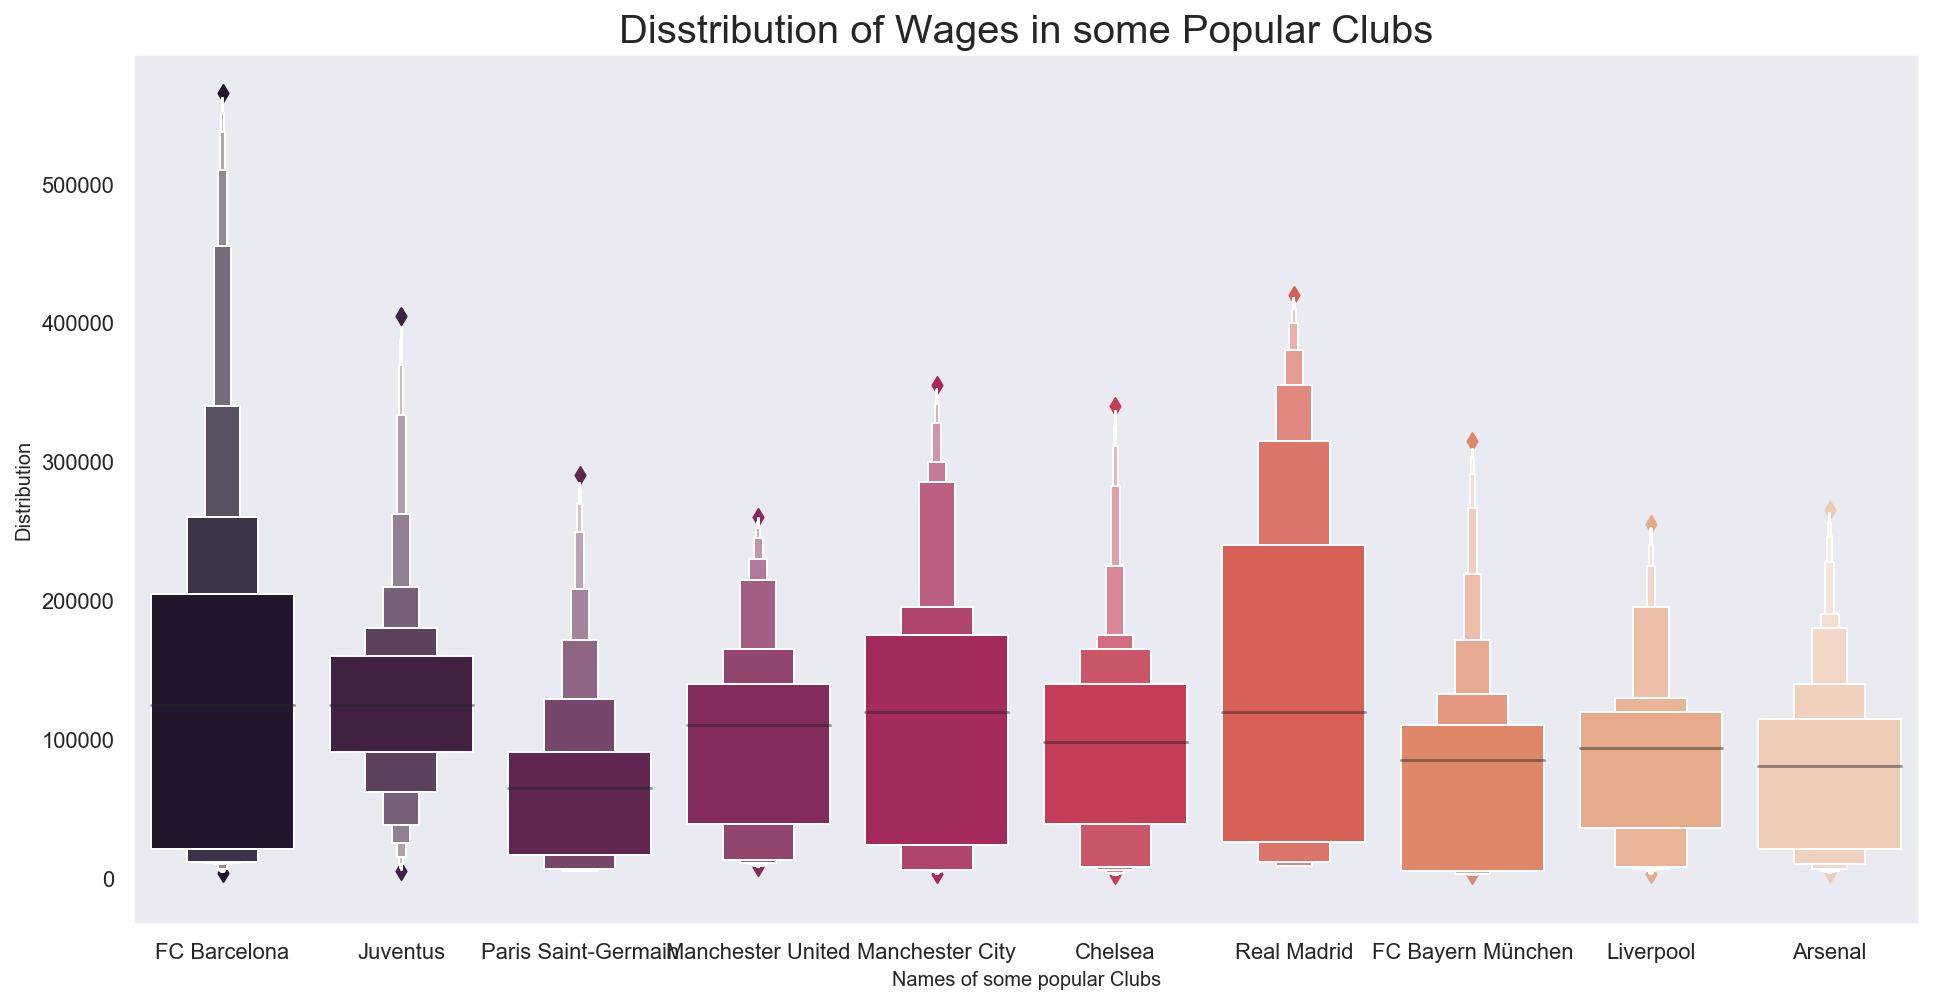

In [42]:
# Distribution of Wages in some Popular clubs

clubs = ('Manchester United', 'Liverpool', 'Manchester City', 'Arsenal', 'Chelsea',
             'Real Madrid', 'FC Barcelona', 'Juventus', 'FC Bayern München', 'Paris Saint-Germain')

data_clubs = fifa.loc[fifa['Club'].isin(clubs) & fifa['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxenplot(x = data_clubs['Club'], y = data_clubs['Wage'], palette = 'rocket')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.show()